# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [104]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [106]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [107]:
%%R -o df
 
# Import data with R
df <- read_csv('combinedwithcensus.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 132
  `Unnamed: 0` Borough   Borough/Citywide Offi…¹ District School `School Name_x`
         <dbl> <chr>     <chr>                      <dbl> <chr>  <chr>          
1            0 Manhattan Manhattan                      1 01M020 P.S. 020 Anna …
2            1 Manhattan Manhattan                      1 01M020 P.S. 020 Anna …
3            2 Manhattan Manhattan                      1 01M020 P.S. 020 Anna …
4            3 Manhattan Manhattan                      1 01M020 P.S. 020 Anna …
# ℹ abbreviated name: ¹​`Borough/Citywide Office (B/CO)`
# ℹ 126 more variables: `School Category` <chr>, Program <chr>, Language <chr>,
#   `Language (Translated)` <chr>, `General/Special Education` <chr>,
#   `Special Education Model` <chr>, fiscal_year <dbl>, system_code <chr>,
#   location_code <chr>, location_name <chr>, BEDS <dbl>,
#   Managed_by_name <chr>, location_type_description <chr>,
#   Location_Category_Description <chr>, Grades_text <chr>, …
# ℹ Use `colnames()` to see all 

In [108]:
import pandas as pd

In [109]:
df.columns.to_list()


['Unnamed: 0',
 'Borough',
 'Borough/Citywide Office (B/CO)',
 'District',
 'School',
 'School Name_x',
 'School Category',
 'Program',
 'Language',
 'Language (Translated)',
 'General/Special Education',
 'Special Education Model',
 'fiscal_year',
 'system_code',
 'location_code',
 'location_name',
 'BEDS',
 'Managed_by_name',
 'location_type_description',
 'Location_Category_Description',
 'Grades_text',
 'Grades_final_text',
 'open_date',
 'Status_descriptions',
 'Primary_building_code',
 'primary_address_line_1',
 'State_code',
 'X_COORDINATE',
 'Y_COORDINATE',
 'LONGITUDE',
 'LATITUDE',
 'Community_district',
 'Council-district',
 'Census_tract',
 'Borough_block_lot',
 'NTA',
 'NTA_Name',
 'Principal_Name',
 'Principal_title',
 'Principal_phone_number',
 'fax_number',
 'Geographical_District_code',
 'Administrative_District_Code',
 'Administrative_District_Name',
 'community_school_sup_name',
 'Tier_3_Support_Location_Name',
 'Tier_3_Support_Leader_Name',
 'Tier_2_Support_Location

In [110]:
df['percent_white_nonhispanic_estimate'] = df['white_nonhispanic_estimate']/df['total_estimate']
df['percent_white_nonhispanic_estimate']

1       0.546265
2       0.546265
3       0.546265
4       0.546265
5       0.546265
          ...   
2538    0.011949
2539    0.011949
2540    0.011949
2541    0.011949
2542    0.011949
Name: percent_white_nonhispanic_estimate, Length: 2542, dtype: float64

In [111]:
df['percent_black_nonhispanic_estimate'] = df['black_nonhispanic_estimate']/df['total_estimate']
df['percent_black_nonhispanic_estimate']

1       0.056094
2       0.056094
3       0.056094
4       0.056094
5       0.056094
          ...   
2538    0.294283
2539    0.294283
2540    0.294283
2541    0.294283
2542    0.294283
Name: percent_black_nonhispanic_estimate, Length: 2542, dtype: float64

In [112]:
df['percent_native_nonhispanic_estimate'] = df['native_nonhispanic_estimate']/df['total_estimate']
df['percent_native_nonhispanic_estimate']

1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
          ...   
2538    0.000937
2539    0.000937
2540    0.000937
2541    0.000937
2542    0.000937
Name: percent_native_nonhispanic_estimate, Length: 2542, dtype: float64

In [113]:
df['percent_asian_nonhispanic_estimate'] = df['asian_nonhispanic_estimate']/df['total_estimate']
df['percent_asian_nonhispanic_estimate']

1       0.138925
2       0.138925
3       0.138925
4       0.138925
5       0.138925
          ...   
2538    0.004217
2539    0.004217
2540    0.004217
2541    0.004217
2542    0.004217
Name: percent_asian_nonhispanic_estimate, Length: 2542, dtype: float64

In [114]:
df['percent_someother_nonhispanic_estimate'] = df['someother_nonhispanic_estimate']/df['total_estimate']
df['percent_someother_nonhispanic_estimate']

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2538    0.0
2539    0.0
2540    0.0
2541    0.0
2542    0.0
Name: percent_someother_nonhispanic_estimate, Length: 2542, dtype: float64

In [115]:
df['percent_two_or_more_nonhispanic_estimate'] = df['two_or_more_nonhispanic_estimate']/df['total_estimate']
df['percent_two_or_more_nonhispanic_estimate']

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2538    0.0
2539    0.0
2540    0.0
2541    0.0
2542    0.0
Name: percent_two_or_more_nonhispanic_estimate, Length: 2542, dtype: float64

In [116]:
df['percent_hispanic_estimate'] = df['hispanic_estimate']/df['total_estimate']
df['percent_hispanic_estimate']

1       0.195806
2       0.195806
3       0.195806
4       0.195806
5       0.195806
          ...   
2538    0.688613
2539    0.688613
2540    0.688613
2541    0.688613
2542    0.688613
Name: percent_hispanic_estimate, Length: 2542, dtype: float64

In [117]:
df

,Unnamed: 0,Borough,Borough/Citywide Office (B/CO),District,School,School Name_x,School Category,Program,Language,Language (Translated),...,two_or_more_nonhispanic_estimate,hispanic_estimate,median_income_estimate,percent_white_nonhispanic_estimate,percent_black_nonhispanic_estimate,percent_native_nonhispanic_estimate,percent_asian_nonhispanic_estimate,percent_someother_nonhispanic_estimate,percent_two_or_more_nonhispanic_estimate,percent_hispanic_estimate
1,0.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.000000,0.138925,0.0,0.0,0.195806
2,1.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.000000,0.138925,0.0,0.0,0.195806
3,2.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.000000,0.138925,0.0,0.0,0.195806
4,3.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.000000,0.138925,0.0,0.0,0.195806
5,4.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.000000,0.138925,0.0,0.0,0.195806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,2746.0,Bronx,District 75,75.0,75X811,P.S. X811,Secondary School,Transitional Bilingual Education,Spanish,Español,...,0.0,2939.0,31519.0,0.011949,0.294283,0.000937,0.004217,0.0,0.0,0.688613
2539,2747.0,Bronx,District 75,75.0,75X811,P.S. X811,Secondary School,Transitional Bilingual Education,Spanish,Español,...,0.0,2939.0,31519.0,0.011949,0.294283,0.000937,0.004217,0.0,0.0,0.688613
2540,2748.0,Bronx,District 75,75.0,75X811,P.S. X811,Secondary School,Transitional Bilingual Education,Spanish,Español,...,0.0,2939.0,31519.0,0.011949,0.294283,0.000937,0.004217,0.0,0.0,0.688613
2541,2749.0,Bronx,District 75,75.0,75X811,P.S. X811,Secondary School,Transitional Bilingual Education,Spanish,Español,...,0.0,2939.0,31519.0,0.011949,0.294283,0.000937,0.004217,0.0,0.0,0.688613


In [118]:
df.columns.to_list()

['Unnamed: 0',
 'Borough',
 'Borough/Citywide Office (B/CO)',
 'District',
 'School',
 'School Name_x',
 'School Category',
 'Program',
 'Language',
 'Language (Translated)',
 'General/Special Education',
 'Special Education Model',
 'fiscal_year',
 'system_code',
 'location_code',
 'location_name',
 'BEDS',
 'Managed_by_name',
 'location_type_description',
 'Location_Category_Description',
 'Grades_text',
 'Grades_final_text',
 'open_date',
 'Status_descriptions',
 'Primary_building_code',
 'primary_address_line_1',
 'State_code',
 'X_COORDINATE',
 'Y_COORDINATE',
 'LONGITUDE',
 'LATITUDE',
 'Community_district',
 'Council-district',
 'Census_tract',
 'Borough_block_lot',
 'NTA',
 'NTA_Name',
 'Principal_Name',
 'Principal_title',
 'Principal_phone_number',
 'fax_number',
 'Geographical_District_code',
 'Administrative_District_Code',
 'Administrative_District_Name',
 'community_school_sup_name',
 'Tier_3_Support_Location_Name',
 'Tier_3_Support_Leader_Name',
 'Tier_2_Support_Location

## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [119]:
# %%R 

# # Define the columns of interest
# columns_of_interest <- c('# Asian', '# Black', '# Hispanic', '# Multi-Racial', '# Native American',
#                          '# White', '# Missing Race/Ethnicity Data', 'white_nonhispanic_estimate',
#                          'black_nonhispanic_estimate', 'native_nonhispanic_estimate',
#                          'asian_nonhispanic_estimate', 'someother_nonhispanic_estimate',
#                          'two_or_more_nonhispanic_estimate', 'hispanic_estimate')

# # Calculate summary statistics
# summary_stats <- summary(df[columns_of_interest])

# print(summary_stats)


In [120]:
# %%R

# library(dplyr)

# df %>%
#   select(all_of(columns_of_interest)) %>%
#   pivot_longer(cols = everything(), names_to = "variable", values_to = "value") %>%
#   group_by(variable) %>%
#   summarize(
#     mean = mean(value, na.rm = TRUE),
#     median = median(value, na.rm = TRUE),
#     min = min(value, na.rm = TRUE),
#     max = max(value, na.rm = TRUE),
#     sd = sd(value, na.rm = TRUE)
#   )

## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 35 rows containing non-finite values (`stat_boxplot()`). 



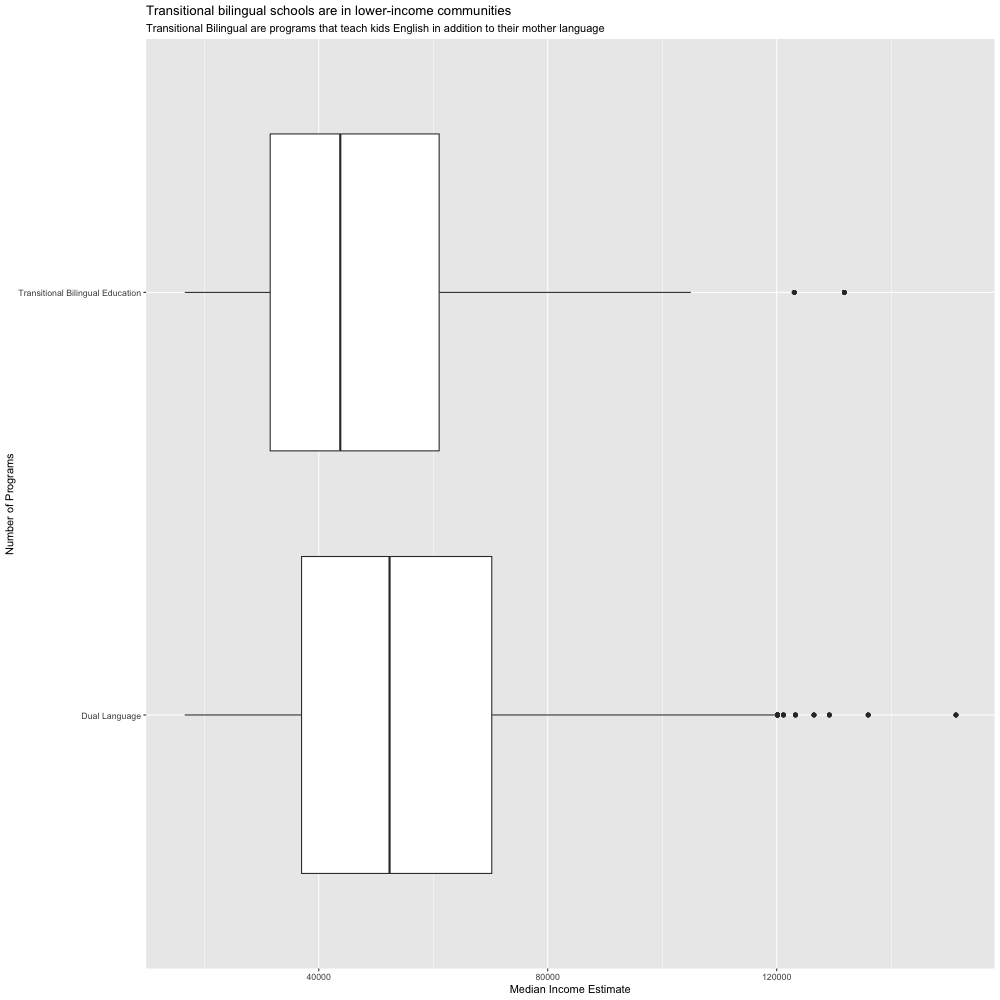

In [121]:
%%R -w 1000 -h 1000

library(ggplot2)
# Create the box and whisker plot
ggplot(df, aes(x = median_income_estimate, y = df$Program)) +
    geom_boxplot() +
    labs(x = "Median Income Estimate", y = "Number of Programs", subtitle = "Transitional Bilingual are programs that teach kids English in addition to their mother language") +
    ggtitle("Transitional bilingual schools are in lower-income communities")


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 35 rows containing non-finite values (`stat_ydensity()`). 



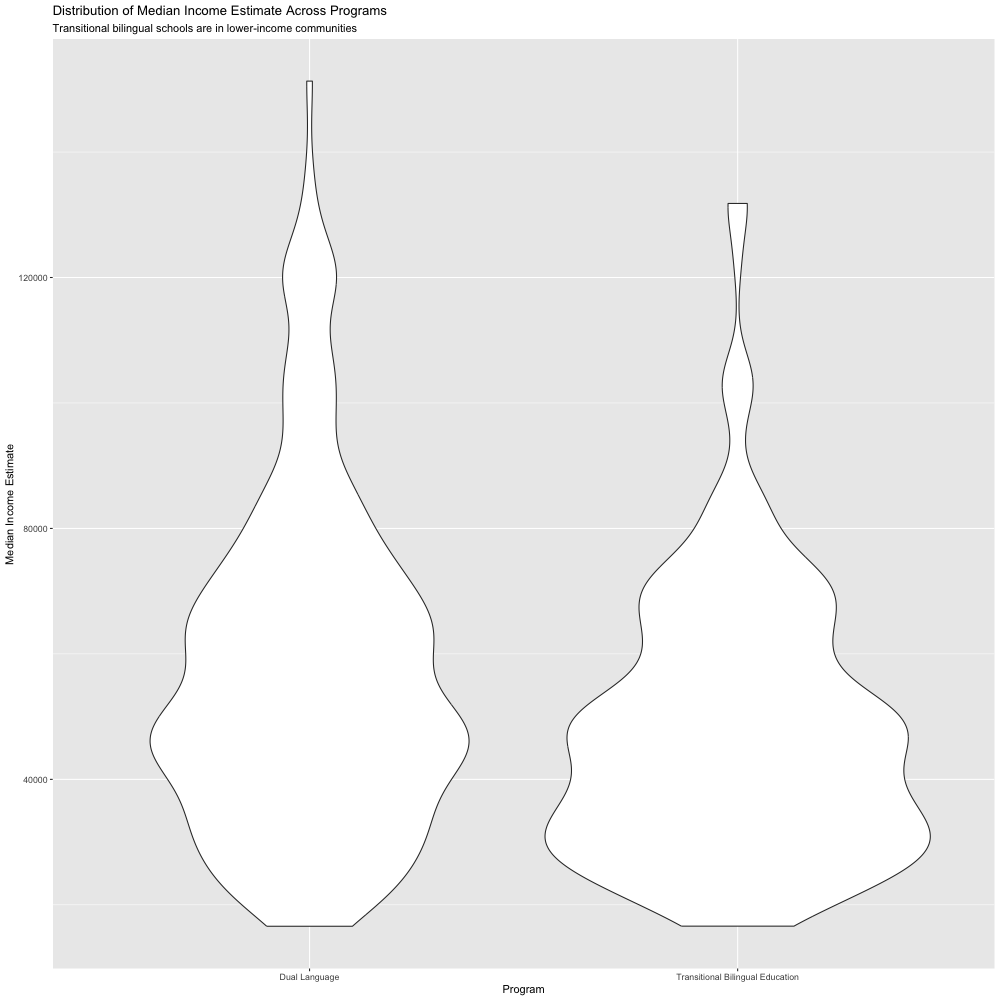

In [136]:
%%R -w 1000 -h 1000
library(ggplot2)

ggplot(df, aes(x = Program, y = median_income_estimate)) +
    geom_violin() +
    labs(x = "Program", y = "Median Income Estimate", subtitle = "Transitional bilingual schools are in lower-income communities") +
    ggtitle("Distribution of Median Income Estimate Across Programs")



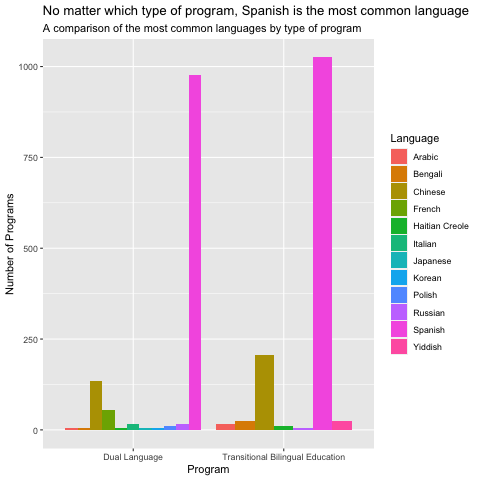

In [123]:
%%R

library(ggplot2)

ggplot(df, aes(x = Program, fill = Language)) +
    geom_bar(position = "dodge") +
    labs(x = "Program", y = "Number of Programs", subtitle = "A comparison of the most common languages by type of program") +
    ggtitle("No matter which type of program, Spanish is the most common language")


### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 15 rows containing missing values (`position_stack()`). 



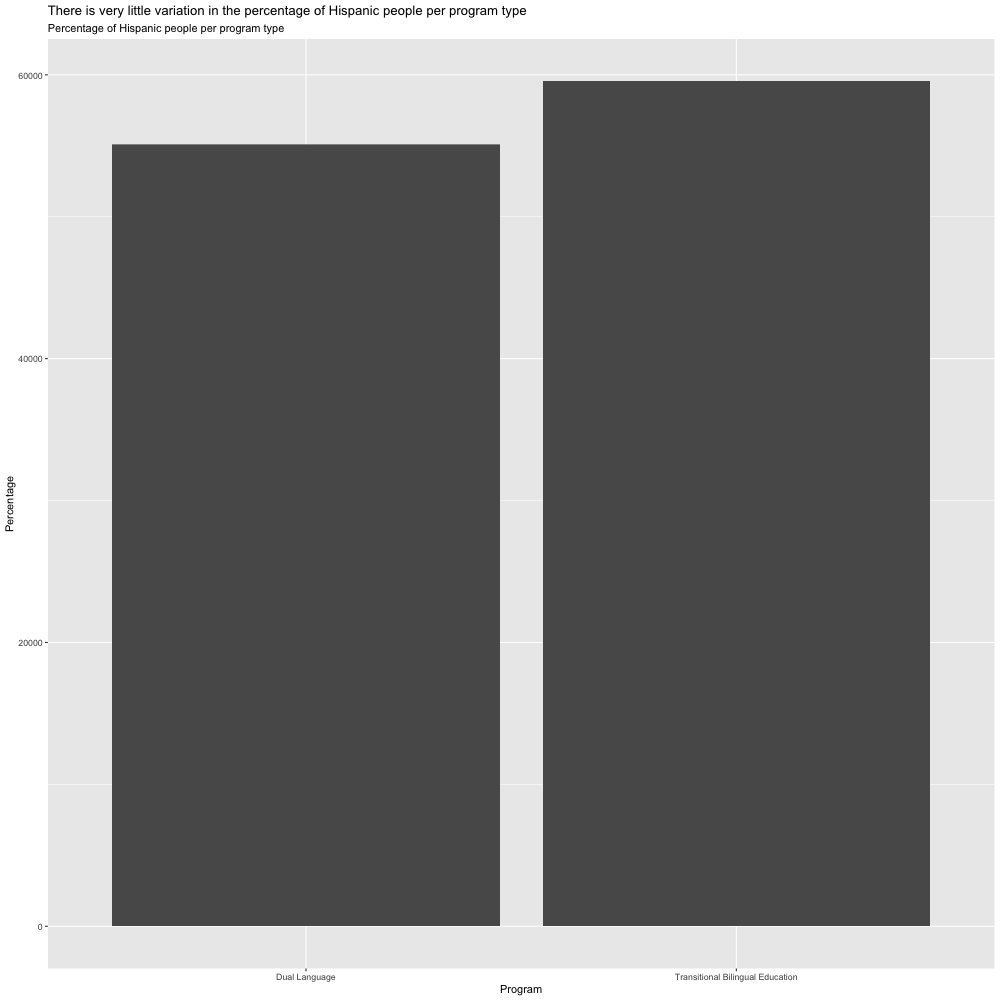

In [131]:
%%R -w 1000 -h 1000

library(ggplot2)

# Check if 'total_estimate' column exists in the dataframe 'df'
if ('hispanic_estimate' %in% colnames(df)) {
    ggplot(df, aes(x = Program, y = hispanic_estimate/total_estimate * 100)) +
        geom_bar(stat = "identity") +
        labs(x = "Program", y = "Percentage", subtitle = "Percentage of Hispanic people per program type") +
        ggtitle("There is very little variation in the percentage of Hispanic people per program type")
} else {
    print("The 'hispanic_estimate' column does not exist in the dataframe 'df'. Please ensure the column is present.")
}


In [ ]:
# code for plot 2
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle